### Step 0: Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

### Step 1: Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As the test set doesn't have the "Survived" column, we can only split the training set to validate the accuracy of the model. Hence, we'll ignore the test set for now, until we want to submit the solution to Kaggle.

In [7]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stanley, Mr. Edward Roland",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
print(pd.isnull(df_train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### PassengerId

From earlier tables, it's apparent that 'PassengerId' is just the index of the passengers. This should have no bearing on the survival. However, it's quite likely that 'PassengerId' is related to the order which the passengers bought the tickets, and there is an off-chance that this is linked to their survival. Let's plot a graph and see if this is true.

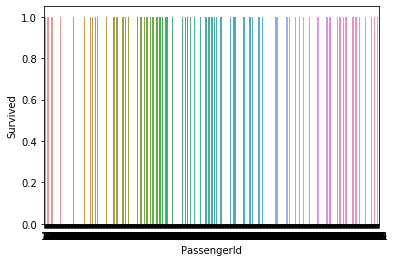

In [11]:
# Examine relationship between 'PassengerID' and 'Survived'
sns.barplot(x='PassengerId',y='Survived', data=df_train, ci=None)

From the barplot above, it looks like there is no perceivable relationship and the 'PassengerId' column can be dropped.

##### Pclass

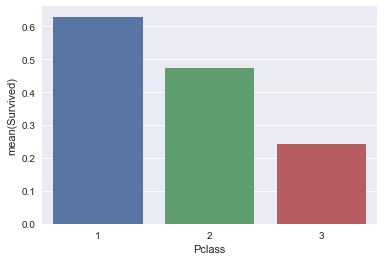

In [91]:
# Examine relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass',y='Survived', data=df_train, ci=None)

It's quite obvious that a disproportionately higher number of passengers from Pclass=1 survived over Pclass=2, and even more so than Pclass=3. Pclass=1 are probably the upper class passengers who were prioritized to board the life boats, while Pclass=3 are probably the lower class or working class passengers.

##### Name

In [12]:
df_train['Name'][0:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [13]:
# create an exploratory dataframe by adding columns to raw dataframe
df_train_binned = df_train.copy(deep=True)

# create a new column by adding "Title" which is extracted from "Name"
df_train_binned['Title'] = df_train_binned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
df_train_binned.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [15]:
df_train_binned['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

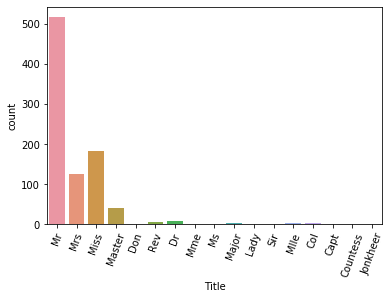

In [16]:
sns.countplot(x='Title', data=df_train_binned)
plt.xticks(rotation=70)

In [17]:
df_train_binned.groupby('Title').Age.mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

It appears that some of the extracted titles are age dependent, for example, "Master" has a mean age of 4.5 years old. This is potentially useful for us to impute the missing "Age" values later.

##### Sex

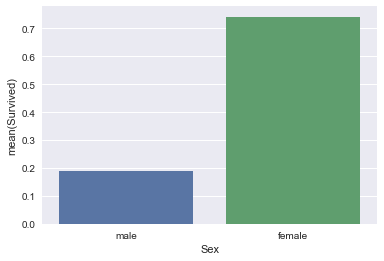

In [92]:
# Examine relationship between 'Sex' and 'Survived'
sns.barplot(x='Sex',y='Survived', data=df_train, ci=None)

As predicted, most females survived while most males perished. Chivalry was alive in the year 1912.

##### Age

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

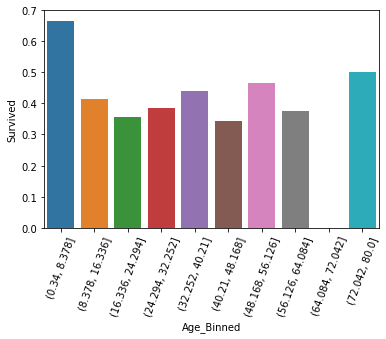

In [18]:
# Examine relationship between 'Age' and 'Survived'

df_train_binned['Age_Binned'] = pd.cut(df_train_binned['Age'], bins=10)
sns.barplot(x=df_train_binned['Age_Binned'], y=df_train_binned['Survived'], estimator = np.mean, ci=None)
plt.xticks(rotation=70)

It looks like significantly more children and slightly more elderly people survived compared to young and middle aged adults. Therefore, "Age" is an important feature. However, it only has 714 non-null data out of 891. Let's see if we can impute the missing data from other info, such as the title in 'Name'.

##### SibSp

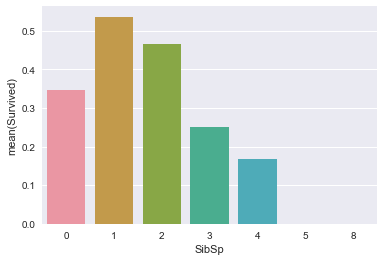

In [94]:
# Examine relationship between 'SibSp' and 'Survived'
sns.barplot(x='SibSp',y='Survived', data=df_train, ci=None)

##### Parch

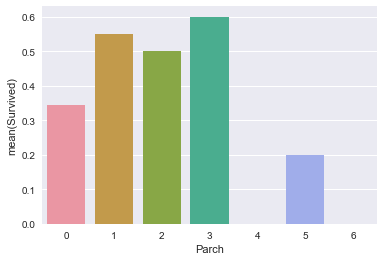

In [95]:
# Examine relationship between 'Parch' and 'Survived'
sns.barplot(x='Parch',y='Survived', data=df_train, ci=None)

There is a definite relationship between "SibSp" and "Survived", as well as "Parch" and "Survived". They do not exhibit the same trend.

##### Ticket

In [19]:
df_train['Ticket'][0:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

On inspection, the data for 'Ticket' appears random, with some having letters in front, and ranging from 1,000's to 100,000's. If anything, the ticket number may be correlated to Pclass, and if that is the case, it is redundant. Either way, we will drop this column.

##### Fare

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

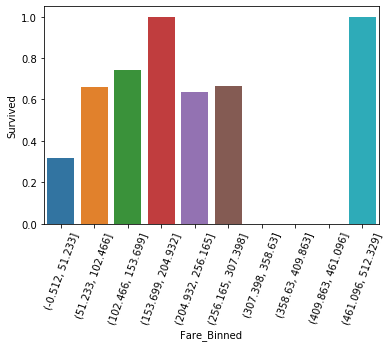

In [20]:
df_train_binned['Fare_Binned'] = pd.cut(df_train_binned['Fare'], bins=10)
sns.barplot(x=df_train_binned['Fare_Binned'], y=df_train_binned['Survived'], estimator = np.mean, ci=None)
plt.xticks(rotation=70)

From the barplot above, quite clearly, all the passengers holding the very expensive tickets survived. The rich were prioritized for survival. However, it's strange that the middle red column all survived too. There are other variables like age or gender that could have affected this.

##### Cabin

Cabin might be an important feature, as some cabins are located closer to the life boats, increasing the chances of survival.

Regretfully, there are only 204 non-null values out of 891 - too many missing values! It's difficult to impute so many values accurately, thus it would be better to drop this column instead.

##### Embarked

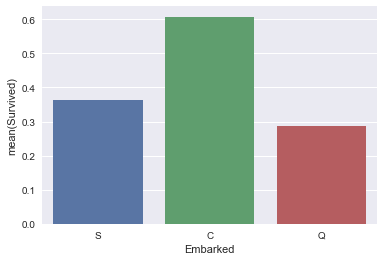

In [116]:
# Examine relationship between 'Embarked' and 'Survived'
sns.barplot(x='Embarked',y='Survived', data=df_train, ci=None)

Titanic's path was: (S) Southampton, England – (C) Cherbourg, France – (Q) Queenstown, Ireland – (Sank before this) New York, USA. From the barplot above, it appears that passengers embarking at Cherbourg, France had much higher survival rates than the rest.

### Step 2. Cleaning the Data

In [ ]:
# Eliminate the 2 rows with null values for "Embarked"
df_train = df_train[pd.notnull(df_train['Embarked'])]

# Eliminate the 177 rows with null values for "Age"
df_train = df_train[pd.notnull(df_train['Age'])]

It's regretful to have to remove so much data due to null "Age" values, but it's difficult to find a good way to impute the missing values. It does not make sense to fill in mean values of "Age", as we've seen that this age group have the lowest survival rates, and doing so would skew the model even more in favour of this.

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [99]:
# Drop the columns discussed in the earlier section
df_train = df_train.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis = 1)

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Embarked    712 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


The above steps have reduced the DataFrame from 891 rows, 12 columns to 712 rows, 7 columns. Out of these 7 columns, 5 columns contain int64 or float64 which are suitable for ML, but 2 columns contain objects (strings and characters).

As scikit-learn does not accept categorical features by default, we will encode the categorical features numerically by using the pandas get_dummies() method.

In [101]:
df_train_dummies = pd.get_dummies(df_train)
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


We can drop 2 rows here as they are redundant, for example, Sex_female is the opposite of Sex_male and only one is needed. Similarly for the "Embarked" feature.

In [102]:
df_train_dummies = df_train_dummies.drop(['Sex_male','Embarked_S'], axis = 1)
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,0,0,0
1,1,1,38.0,1,0,1,1,0
2,1,3,26.0,0,0,1,0,0
3,1,1,35.0,1,0,1,0,0
4,0,3,35.0,0,0,0,0,0


In [105]:
y = df_train_dummies['Survived'].values
print(y.shape)
X = df_train_dummies.drop("Survived", axis=1).values
print(X.shape)

(712,)
(712, 7)


### Step 3: Model Selection and Tuning

Here, we'll try two classification models, KNeighborsClassifier which is non-linear, and Logistic Regression which is linear.

We'll use a pipeline where the first step is to perform scaling, so that features will be on a similar scale and features on a larger scale won't unduly influence the model. For example, many of the features are 0 or 1, but age ranges from 1 to 80.

Then, 3-fold (default) cross validation is applied, and the best hyperparameters chosen using GridSearchCV.

In [123]:
steps = [("scaler", StandardScaler()),("knn", KNeighborsClassifier())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33, stratify=y)

parameters = {'knn__n_neighbors':np.arange(1,10)}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)
print("Tuned hyperparameters: ", cv.best_params_)
print("Training accuracy: ", cv.score(X_train, y_train))
print("Validation accuracy: ", cv.score(X_valid, y_valid))
print(classification_report(y_valid, y_pred))

Tuned hyperparameters:  {'knn__n_neighbors': 4}
Training accuracy:  0.850187265918
Validation accuracy:  0.752808988764
             precision    recall  f1-score   support

          0       0.77      0.83      0.80       106
          1       0.72      0.64      0.68        72

avg / total       0.75      0.75      0.75       178



In [124]:
steps = [("scaler", StandardScaler()),("log_reg", LogisticRegression())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33, stratify=y)

c_space = np.logspace(-5,8,15)
parameters = {'log_reg__C':c_space}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)
print("Tuned hyperparameters: ", cv.best_params_)
print("Training accuracy: ", cv.score(X_train, y_train))
print("Validation accuracy: ", cv.score(X_valid, y_valid))
print(classification_report(y_valid, y_pred))

Tuned hyperparameters:  {'log_reg__C': 3.7275937203149381}
Training accuracy:  0.816479400749
Validation accuracy:  0.780898876404
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       106
          1       0.73      0.74      0.73        72

avg / total       0.78      0.78      0.78       178



### Step 4: Conclusion

Using KNN yields a 85.0% training accuracy and 75.3% validation accuracy, while using Logistic Regression yields a lower **81.7% training accuracy** but higher **78.1% validation accuracy**. The larger difference between training and validation accuracies is likely because the non-linear KNN was starting to overfit the data with a more complex boundary, while it looks like a more simple linear boundary by the Logistic Regression model was sufficient and more accurate.